## 8-3 합성곱 신경망의 시각화

In [28]:
from google.colab import drive
drive.mount('/content/drive')  # 구글 드라이브 마운트

bm = '/content/drive/MyDrive/bm.keras'  # 저장 경로 설정

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from tensorflow import keras

(train,target1),(test,target2)=keras.datasets.fashion_mnist.load_data()

strain=train.reshape(-1,28,28,1)/255.0

In [30]:
from sklearn.model_selection import train_test_split

strain,val,target1,target3=train_test_split(strain,target1,stratify=target1,random_state=0)

In [31]:
m=keras.Sequential()

m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

m.add(keras.layers.MaxPooling2D(2))

m.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'))

m.add(keras.layers.MaxPooling2D(2))

m.add(keras.layers.Flatten())

m.add(keras.layers.Dense(100,activation='relu'))

m.add(keras.layers.Dropout(0.3))

m.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint(bm,save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(strain, target1, epochs=20,
                validation_data=(val, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accuracy: 0.7517 - loss: 0.6876 - val_accuracy: 0.8785 - val_loss: 0.3223
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.8731 - loss: 0.3471 - val_accuracy: 0.8966 - val_loss: 0.2701
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.8952 - loss: 0.2875 - val_accuracy: 0.9027 - val_loss: 0.2587
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9058 - loss: 0.2545 - val_accuracy: 0.9128 - val_loss: 0.2319
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 55ms/step - accuracy: 0.9167 - loss: 0.2226 - val_accuracy: 0.9143 - val_loss: 0.2278
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9249 - loss: 0.2011 - val_accuracy: 0.9159 - val_loss: 0.2232
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 52ms/step - accuracy: 0.9291 - loss: 0.1870 - val_accuracy: 0.9179 - val_loss: 0.2287
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.9388 -

### 8-3-1 가중치 시각화

In [34]:
from tensorflow import keras

m = keras.models.load_model(bm)

model에 들어있는 층들은 `layers`를 출력해서 확인할 수 있다. 출력결과는 리스트다.

In [35]:
m.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <MaxPooling2D name=max_pooling2d_7, built=True>,
 <Flatten name=flatten_3, built=True>,
 <Dense name=dense_6, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_7, built=True>]

그 가운데 맨 첫번째에 있는 합성곱층에 대해 가중치를 살펴보자. 가중치들은 `weights`라는 이름의 리스트에 들어있다.

In [40]:
layer1 = m.layers[0]
len(layer1.weights)

2

`weights`의 항목 수는 2개다. 각각의 shape을 보자.

In [41]:
print(layer1.weights[0].shape, layer1.weights[1].shape)

(3, 3, 1, 32) (32,)


위의 결과가 나온 이유를 살펴보기 위해 8-2절 446쪽의 코드를 다시 보자.

    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [44]:
m.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

(28, 28, 1) 크기의 입력을 받아들여 크기 (3,3)의 필터 32개를 사용하여 합성곱을 만들며, same padding을 적용한다.

따라서 `weights[0]`에 있는 가중치의 갯수는 $32 \times 3 \times 3 = 288$ 개(입력 데이터가 3차원 배열이므로 shape을 (3,3,1,32)로 표현)이고 `weights[1]`에 들어있는 절편은 필터마다 하나씩이므로 모두 32개(1차원 배열)다.

그런데 이 가중치와 절편은 Tensor 클래스의 객체(7장 수업자료 마지막 부분 참조)로 되어있으므로 우리에게 친숙한 넘파이 배열로 바꾸자.

32개 필터 전체 총 288개 가중치값들의 평균, 표준편차를 구하고 histogram 그림으로 그려서 분포도 살펴보자.

In [45]:
layer1_w = layer1.weights[0].numpy()

In [48]:
print(layer1_w.mean(),layer1_w.std())

-0.01708072 0.22671074


In [66]:
print(layer1_w.min(),layer1_w.max())

-1.0936338 0.44267756


32개 가운데 (3,3) 크기인 첫번째 필터의 가중치들을 출력해보자. (*퀴즈 : 아래에서 대괄호 속 세번째 인자가 0인 이유는?)

In [47]:
layer1_w[:,:,0,0]

array([[-0.05610222,  0.12348479, -0.17068529],
       [ 0.0600827 ,  0.17739177, -0.02567851],
       [-0.05085388, -0.13287666,  0.03444158]], dtype=float32)

histogram을 그리려면 `reshape(-1, 1)` 또는 `reshape(-1,)`을 이용해서 입력 데이터의 차원을 바꾸어야한다.

(array([ 2.,  3.,  0.,  1., 12., 39., 79., 75., 58., 19.]),
 array([-1.09363377, -0.94000262, -0.78637153, -0.63274038, -0.47910923,
        -0.32547811, -0.17184697, -0.01821584,  0.13541529,  0.28904644,
         0.44267756]),
 <BarContainer object of 10 artists>)

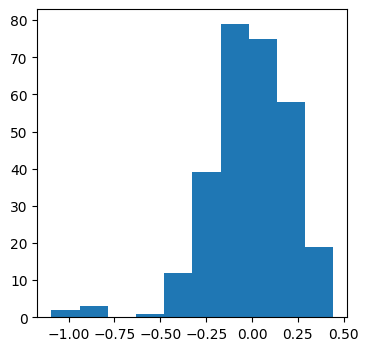

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,4))
plt.hist(layer1_w.reshape(-1,1))

`imshow()`함수를 이용해서 그림으로 그려보자.

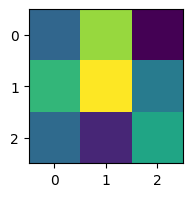

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2,2))
plt.imshow(layer1_w[:,:,0,0])

값이 클수록 밝은 색으로 나타나는 것을 알 수 있다. 그림 크기가 너무 크면 줄여서 맨마지막 필터도 그려보자.

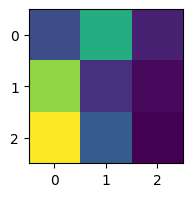

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2,2))
plt.imshow(layer1_w[:,:,0, -1])

여기서 교재 468쪽에 있는 `imshow()` 함수 설명을 잘 읽어보자. 아래 코드에 `vmin, vmax`가 추가되는 이유를 알 수 있을 것이다.

`imshow()` 함수에 `vmin, vmax`를 추가해서 첫번째 그림과 마지막 그림을 나란히 그려보자.

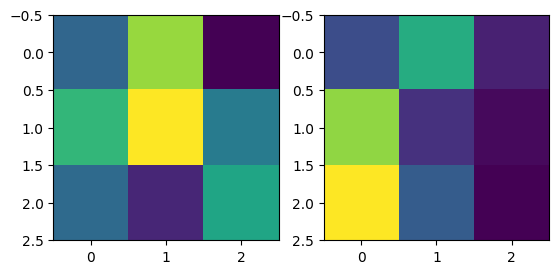

In [61]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

for k in range(2):
  axs[k].imshow(layer1_w[:,:,0, k*31])

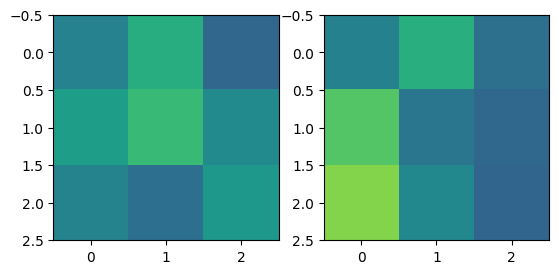

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

for k in range(2):
  axs[k].imshow(layer1_w[:,:,0, k*31], vmin = -0.5, vmax = 0.5)

이번에는 (3,3) 커널 32개를 한꺼번에 그림으로 나타내보자.

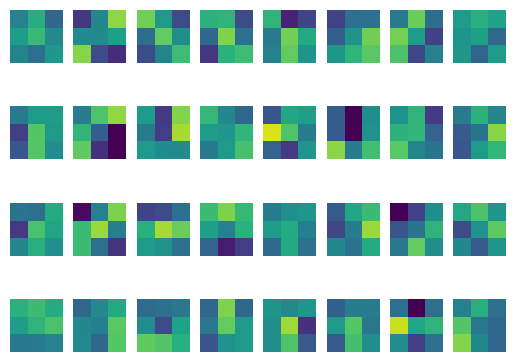

In [75]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 8)

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(layer1_w[:,:,0,i*8 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

데이터 훈련과 위의 결과가 어떤 관계인지 알아보기 위해 이번에는 아무 훈련도 하지 않은 합성곱 신경망 모델을 만들어보자.이때 텐서플로는 균등분포에서 뽑은 랜덤한 난수값을 가중치로 삼는다.

In [76]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [78]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())
print(no_training_weights.min(), no_training_weights.max())

0.0042877626 0.07862873
-0.13945726 0.14117907


(array([32., 23., 19., 24., 35., 31., 46., 23., 31., 24.]),
 array([-0.13945726, -0.11139362, -0.08332999, -0.05526636, -0.02720273,
         0.00086091,  0.02892454,  0.05698817,  0.0850518 ,  0.11311544,
         0.14117907]),
 <BarContainer object of 10 artists>)

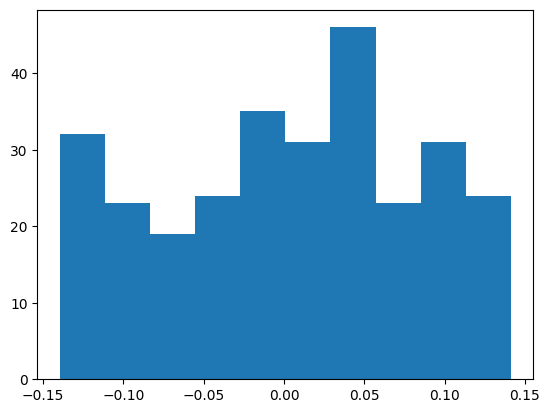

In [79]:
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1, 1))

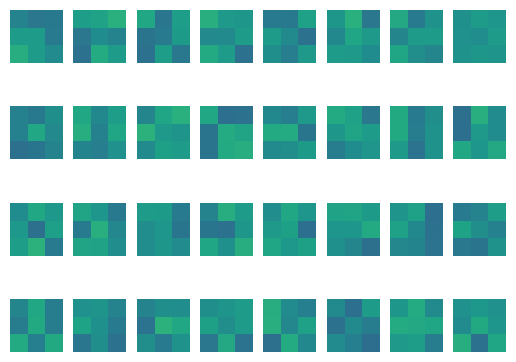

In [80]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 8)

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(no_training_weights[:,:,0,i*8 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

#### 8-3-2 함수형 API

지금까지 우리는 층을 순서대로 쌓아가는 `Sequential()`클래스를 이용해서 신경망 모델을 만들었다. 하지만 더 복잡한 모델을 만들 때에는 `Sequential()`클래스 대신 **함수형 API**(functional API)를 많이 사용한다.

교재 471-473쪽 설명과 같이 Dense층 2개로 이루어진 신경망을 함수형API를 이용해서 만들어보자.

    dense1 = keras.layers.Dense(100, activation='sigmoid')
    dense2 = keras.layers.Dense(10, activation='softmax')

이렇게 만든 두 객체 `dense1, dense2`는 다음과 같이 함수처럼 이용할 수 있다.

    hidden = dense1(inputs)
    outputs = dense2(hidden)

모델을 만들 때에는 케라스의 `Model` 클래스의 괄호 속에 `inputs, outputs`를 넣어주면 된다.

    model = keras.Model(inputs, outputs)

그런데 `inputs`은 어떻게 만들까? `Sequential()`클래스로 모델을 만들 때에는 자동으로 449-450쪽에서 그림을 통해 보았던 `InputLayer`가 입력층을 만드는 역할을 했지만 함수형API에서는 케라스의 `Input()` 클래스를 이용해서 아래처럼 직접 만들어야한다.

    inputs = keras.Input(shape = (784,))

이제 우리는 `inputs`부터 `outputs`까지 연결되는 모델을 473쪽 첫번째 그림처럼 나타낼 수 있게 되었다.

* 8-2절에서 공부한 합성곱 모델로 한번 더 연습해보자.

In [81]:
from tensorflow import keras

inputs = keras.Input(shape = (28, 28,1))

x = keras.layers.Conv2D(32, kernel_size=3, activation='relu',padding='same')(inputs)

x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same')(x)

x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(100, activation='relu')(x)

x = keras.layers.Dropout(0.3)(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

m = keras.Model(inputs, outputs)

In [82]:
m.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

각 층들은 아래와 같이 리스트로 확인할 수 있다.

In [83]:
m.layers

[<InputLayer name=input_layer_5, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_9, built=True>]

첫번째 합성곱 층은 리스트에 두번째 항목으로 들어있으므로 아래와 같이 부를 수 있다.

In [84]:
m.layers[1]

<Conv2D name=conv2d_9, built=True>

여기서 우리가 model 전체가 아니라 input부터 con2d_1의 출력까지만 연결한 모델을 만들고 싶다고 해보자.

In [86]:
m.input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_222>

In [87]:
m.layers[1].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor_223>

전체 모델 대신 `model.input`과 `model.layers[1].output`을 연결하는 모델을 만들고 싶다면 아래와 같이 keras의 `Model`클래스를 이용하면 된다.

In [88]:
m_f = keras.Model(m.input, m.layers[1].output)

In [89]:
m_f.summary()

Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

`m_f`로 첫번째 validation data의 예측값을 구해보자.

In [91]:
val.shape

(15000, 28, 28, 1)

In [92]:
val[0].shape

(28, 28, 1)

In [93]:
val[0:1].shape

(1, 28, 28, 1)

`conv2d`의 입력은 4차원이어야하므로 예측할 데이터를 `val[0]` 대신 `val[0:1]` 같이 입력해야한다.

#### 8-3-3 특성 맵 시각화

훈련 데이터세트의 첫번째 데이터를 가지고 첫번째 합성곱 층 출력을 만드는 `m_f` 모델과 두번째 합성곱층의 출력을 만드는 `m_f` 모델의 특성맵을 시각화해보자.

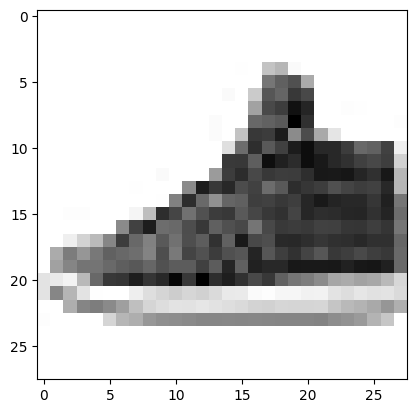

In [107]:
import matplotlib.pyplot as plt

plt.imshow(strain[0], cmap = 'gray_r')

In [108]:
strain.shape

(45000, 28, 28, 1)

In [109]:
strain[0].shape

(28, 28, 1)

In [110]:
strain[0:1].shape

(1, 28, 28, 1)

In [111]:
inputs = strain[0:1].reshape(-1, 28, 28, 1)/255.0

In [112]:
inputs.shape

(1, 28, 28, 1)

In [114]:
pred = m_f.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [115]:
pred.shape

(1, 28, 28, 32)

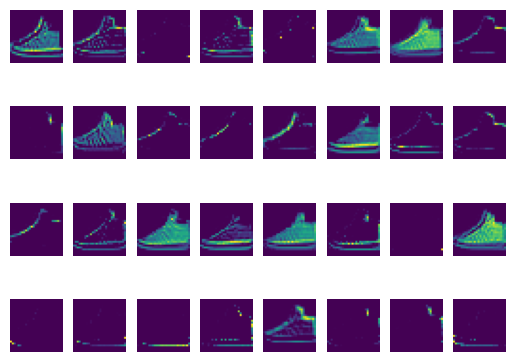

In [117]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 8)

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(pred[0,:,:,i*8 + j])
        axs[i, j].axis('off')

475-476쪽 그림과는 다르지만 476쪽 설명을 참고해서 그림을 해석해볼 수 있다.

또 두번째 합성곱층의 출력을 모델의 입력과 연결하는 모델을 만들고 싶다면

In [118]:
m.layers

[<InputLayer name=input_layer_5, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <MaxPooling2D name=max_pooling2d_8, built=True>,
 <Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Flatten name=flatten_4, built=True>,
 <Dense name=dense_8, built=True>,
 <Dropout name=dropout_4, built=True>,
 <Dense name=dense_9, built=True>]

In [119]:
m_f2 = keras.Model(m.input, m.layers[3].output)

In [121]:
m_f2.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

두번째 합성곱층의 필터는 크기가 (3, 3, 32)이고 필터의 수는 64개이므로 각 필터가 만드는 피처맵의 크기는 아래와 같아진다. 그 층의 입력은 첫번째 합성곱의 특성맵 (28,28,32)에 MaxPooling(2)를 적용한 결과이므로 크기는 (14, 14, 32)다.

In [122]:
pred2 = m_f2.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [124]:
pred2.shape

(1, 14, 14, 64)

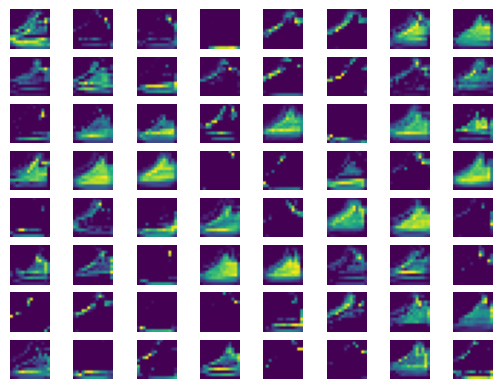

In [127]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 8)

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(pred2[0,:,:,i*8 + j])
        axs[i, j].axis('off')